Instrucciones
=============

1. Instalar ipython notebook
----------------------------

Ipython notebook es lo que usamos para crear y ejecutar estos "documentos con código" (notebooks). Lo instalamos usando pip:

    pip install "ipython[notebook]"
    
(con ``sudo`` antes, para los que están en linux y no están usando virtualenvs)


2. Instalar libs
----------------

Además vamos a estar usando varias libs útiles, que se instalan también con pip:

    pip install scikit-learn scipy pandas matplotlib keras tensorflow h5py
    

3. Abrir este notebook
----------------------

Bajen los archivos ``tp_final.ipynb`` y ``utils.py`` del repo (directorio ``2017/tp_final``), luego abran una consola, ingresen al directorio donde se encuentran los archivos, y ejecuten:

    ipython notebook
  
Esto les va a abrir una ventana del navegador web, donde pueden ver la lista de archivos del directorio, y entre esos archivos van a ver el notebook que se bajaron. Háganle click para abrirlo.

4. Uso del notebook
-------------------

La interfaz es bastante sencilla. Algunas cosas básicas que les pueden resultar útiles:

 * Para modificar el texto de una celda, háganle ``click`` o ``doble click``.

 * Para ejecutar una celda sola de forma rápida, usen ``shift+enter`` (en las de código, ejecuta el código, en las de texto, lo renderiza). 
 
 * Mientras el código se está ejecutando, al lado de la celda van a ver un ``[*]``. Eso significa que la celda aún se está ejecutando. Cuando ven un número (ej: ``[42]``), significa que ya terminó de ejecutarse (y el número es el orden en el cual esa celda fue ejecutada).
 
 * Pueden ejecutar todas las veces que quieran las celdas, en el orden que prefieran, etc. (pero claramente, para arrancar conviene ejecutar las celdas en orden)

Pueden experimentar con el resto de las cosas que ven en la interfaz :)
    
Consigna
========

¿Qué tan buenos somos para reconocer personas?. Casi todos podríamos decir que lo hacemos muy bien, sin embargo ...

<img src="https://k42.kn3.net/6/F/2/E/B/C/EC0.jpg" width="50%" />

<center>¿Luca Modric o David Guetta?</center>

<img src="http://www.oddities123.com/wp-content/uploads/2016/02/similar-looking-people-7.jpg" width="50%" />

<center>¿Jack Nicholson o Leonardo Dicaprio?</center>

<img src="http://1.bp.blogspot.com/_BQ05SdY_Qk0/SmoUY1TVaeI/AAAAAAAAAUE/NwiqQgpb_Dg/s400/Fabio+Posca+-+Bob+Pati%C3%B1o.jpg" width="50%" />

<div>

<img src="https://i.imgur.com/0ppqBFz.jpg" width="25%" />
<img src="https://lh6.googleusercontent.com/-60b0uUWJlhA/AAAAAAAAAAI/AAAAAAAAt4E/BHc54O2XIqs/photo.jpg" width="25%" />

</div>

<center>¿Fisa o guerrero medieval?</center>

-----------

Como queda claro, a veces la cosa se puede complicar y no resulta tan sencillo :) Y si quisieramos programar algo a mano que sepa resolver esta tarea? Sería prácticamente imposible.

En este trabajo práctico vamos a utilizar redes neuronales para intentar ayudar a una máquina con esta tarea. Claro, como la máquina es la primera vez que se encuentra con este problema nos vamos a guardar los parecidos para más adelante y vamos a empezar a enseñarle a reconocer a algunos de los profes de la cátedra usando redes neuronales!

Para poder hacer esto, tenemos un conjunto de datos de datos que contiene 4920 imágenes clasificadas de ariel, fisa, gabi y mariano. En cada uno de estos casos tenemos la certeza (etiqueta) de quién es el que figura en la imagen. Vamos a usar este set de datos para entrenar el modelo y ver qué tan bien le está yendo a la hora de clasificar personas.

En clases vamos a ver cómo construir una red neuronal básica, y en este notebook ya tienen el código necesario para leer los datos, mostrar las imágenes, y evaluar la exactitud de la red.
El trabajo de ustedes consistirá en escribir el fragmento de código que construye y entrena la red neuronal, de forma tal que las métricas indiquen un 70% o más de accuracy en el conjunto de **test**.

Como el resultado no es el mismo si corren varias veces el código, lo que deben lograr es una red que en **al menos 3 de 5 ejecuciones**, logre 70% o más de accuracy.
No es válido entregar código que alguna vez tuvimos suerte y llegó al 70%, pero que habitualmente no lo alcanza.

La entrega se realizará subiendo el archivo ``tp_final.ipynb`` modificado por ustedes, a la **raiz** del repositorio del grupo.

# Imports y configs

In [1]:
# imports de libs que usamos para leer y procesar datos en masa
import os

import numpy as np
import pandas as pd

# lib que usamos para mostrar las imágenes
import matplotlib.pyplot as plt

# libs que usamos para tareas generales de machine learning: separar conjuntos de datos, evaluar exactitud, etc
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# libs que usamos para construir y entrenar redes neuronales
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout, Convolution2D, MaxPooling2D, Flatten

# cosas que definimos en nuestro proyecto
from utils import get_input_columns

# configuración para que las imágenes se vean dentro del notebook
%matplotlib inline

Using TensorFlow backend.


In [2]:
# algunas configuraciones generales respecto a las imagenes
PICTURE_SIZE = 64
CHANNELS = 'rgb'
INPUT_COLUMNS = get_input_columns(PICTURE_SIZE)

Datos
=====

Leemos todas las imágenes que están guardadas en un solo archivo y mostramos 5 filas de ejemplo. Para que esto funcione, deben bajar el archivo ``data_64x64.pkl`` desde [este link](https://drive.google.com/drive/folders/0B5cCDhynqkqDczZDd3JTSENFcDg?usp=sharing) y ubicarlo en el mismo directorio que el notebook (en el link los archivos están comprimidos, así que van a tener que extraerlos después de bajarlos).

Cada fila es una imagen. Cada imagen tiene muchos pixeles. Y cada pixel tiene 3 valores: cuánto de rojo, cuánto de verde y cuánto de azul (estos son "canales" de color).

Eso quiere decir que si la imagen tiene 64 x 64 pixeles, y cada pixel tiene 3 valores, entonces tenemos 64 x 64 x 3 = 12.288 columnas.

Luego tenemos 3 columnas más que no son pixeles: 

- 'person': indica que persona está en la foto, o dicho técnicamente, la etiqueta para ese caso (ariel, fisa, gabi o mariano)
- 'file': el nombre de la imagen original (para uso interno nuestro)
- 'place': el lugar donde fue tomado el video (nos sirve para separar sets de imágenes)

En el link donde está el dataset también les dejamos imágenes en menor resolución (24x24 y 32x32), por si les demora demasiado y quieren intentar con sets más livianos. Si van a usar otro dataset y no el de 64x64, recuerden actualizar la setting ``PICTURE_SIZE``.

In [3]:
print('reading data...')
data = pd.read_pickle('./data_{}x{}.pkl'.format(PICTURE_SIZE, PICTURE_SIZE))
data.shape

reading data...


(4920, 12291)

In [4]:
data.sample(5)

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,b4089,b4090,b4091,b4092,b4093,b4094,b4095,file,person,place
2100,182,183,183,183,183,183,183,183,184,184,...,26,26,27,27,32,33,113,fisa_pared_mp4_128.jpg,fisa,pared
2953,142,139,135,139,142,141,144,145,143,142,...,40,43,104,136,135,142,145,gabi_cortina_mp4_076.jpg,gabi,cortina
4879,126,130,133,136,139,144,149,153,158,161,...,22,22,23,25,26,31,34,mariano_pared_mp4_528.jpg,mariano,pared
315,137,138,138,139,139,139,140,141,142,142,...,7,5,6,11,7,7,145,ariel_aula_mp4_316.jpg,ariel,aula
1466,107,111,112,115,118,119,121,126,98,118,...,43,43,43,46,47,44,41,fisa_aula_mp4_176.jpg,fisa,aula


Y consultamos además qué etiquetas hay en general:

In [5]:
PERSONS = list(data.person.unique())
PERSONS

['ariel', 'fisa', 'gabi', 'mariano']

Esta función nos permite pasarle un conjunto de imagenes (filas de la tabla), y nos las dibuja. También admite usar varias columnas de la tabla como título para cada imagen.

In [6]:
def show_images(samples, title='file'):
    for index, sample in samples.iterrows():
        if title is not None:
            if isinstance(title, str):
                title = [title, ]
            title_text = ', '.join(str(sample[title_field]) for title_field in title)
            plt.title(title_text)

        sample_as_grid = sample[INPUT_COLUMNS].values.reshape(len(CHANNELS), PICTURE_SIZE, PICTURE_SIZE).astype(np.float)
        sample_as_grid = np.transpose(sample_as_grid, (1, 2, 0)) / 255
        
        plt.axis('off')
        plt.imshow(sample_as_grid, interpolation='nearest')

        plt.show()

Mostramos algunas imágenes de ejemplo al azar. Pueden ustedes distinguir lo que hay en cada imagen? (si ejecutan esta celda muchas veces, van a ir viendo imágenes diferentes).

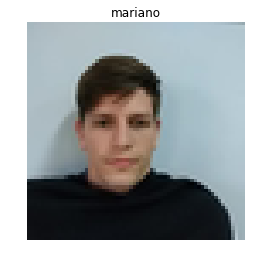

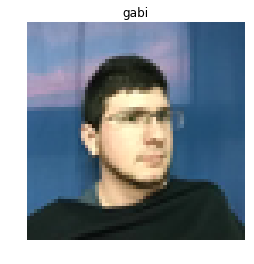

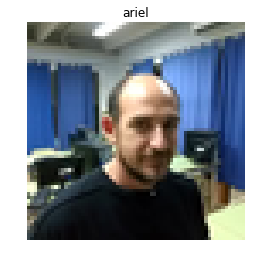

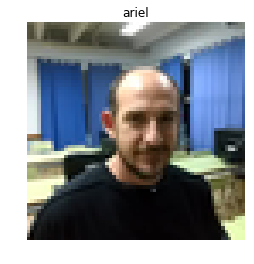

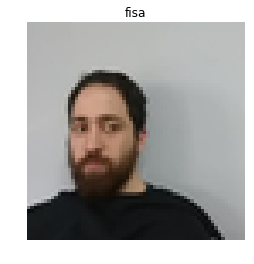

In [9]:
show_images(data.sample(5), 'person')

Y finalmente, separamos los datos en dos conjuntos, vamos a utilizar uno para entrenar la red y el otro para testearla (y de esa forma asegurarnos de que no estamos sobreentrenando, evaluar cómo se va a comportar con casos que no usó para entrenar, etc).
Para hacer esto nos vamos a valer del lugar dónde fue sacada la foto, es decir, vamos a construir nuestro conjunto de test a partir de las fotos que tienen como fondo la cortina.

In [ ]:
train = data[data.place != 'cortina'].copy()
test = data[data.place == 'cortina'].copy()

sets = (
    ('train', train),
    ('test', test),
)

for set_name, set_data in sets:
    print('#' * 20, set_name, 'labels', '#' * 20)
    print(set_data.person.value_counts())
    print()

Red neuronal
============

Estas funciones nos van a ser útiles para no repetir código cada vez que queramos obtener las columnas de entrada y las salidas, en el formato de arrays que la red neuronal espera.

In [ ]:
def extract_inputs(dataset):
    """ Extrae del conjunto de datos original solo 
        las columnas que se deben utilizar como entrada. 
    """
    return dataset[INPUT_COLUMNS].values / 255


def extract_outputs(dataset):
    """ Extrae del conjunto de datos original solo la 
    columna que se debe utilizar como salida y retorna
    tantas columnas como etiquetas distintas existan.
    Por ejemplo, podríamos pensar que las columnas resultantes
    serían: es_fisa, es_gabi, es_mariano.
    """
    
    is_person_columns = [(dataset.person == person).values for person in PERSONS]
    return np.array(is_person_columns).T

Y aquí es donde ustedes tienen que completar su entrega:

In [ ]:
# Crear la red aquí
model = None

# Compilar la red aquí


In [ ]:
# Entrenar la red aquí

Una vez entrenada, pueden evaluar la performance de la red neuronal utilizando los dos conjuntos, con este fragmento de código.

Deben lograr que **accuracy** en el conjunto de **test** llege a 70% (0.7) o más.

Esta función nos va a ser útil para agrupar las predicciones y poder comparar.

In [ ]:
def add_predictions(dataset):
    predictions = model.predict(extract_inputs(dataset))
    for person_number, person in enumerate(PERSONS):
        dataset[person] = predictions[:, person_number]
    
    dataset['prediction'] = dataset[PERSONS].idxmax(axis=1)
    dataset['correct'] = dataset.prediction == dataset.person

In [ ]:
for set_name, set_data in sets:
    add_predictions(set_data)
    
    print('#' * 25, set_name, '#' * 25)
    print('accuracy', accuracy_score(set_data.person, set_data.prediction))
    print(classification_report(set_data.person, set_data.prediction))

Finalmente, podemos mostrar algunos ejemplos del conjunto de test para evaluar cómo le fue (las predicciones fueron agregadas en el paso anterior, al llamar a ``add_predictions``).

El título en cada imagen indica el nombre de la persona en la foto seguido de la predicción que hizo la red.

Mostramos primero algunos que hayan sido bien clasificados, y luego otros que hayan sido mal clasificados.

In [ ]:
show_images(test[test.person == test.prediction].sample(10), title=['person', 'prediction'])

In [ ]:
show_images(test[test.person != test.prediction].sample(10), title=['person', 'prediction'])